In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/spam.csv",encoding='latin1')

In [3]:
data_copy = data.copy()

In [4]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1891,ham,Probably earlier than that if the station's wh...,NaN,NaN,NaN
4242,ham,Okie...,NaN,NaN,NaN
1859,ham,What's up. Do you want me to come online?,NaN,NaN,NaN
3253,ham,I can make lasagna for you... vodka...,NaN,NaN,NaN
3878,ham,She left it very vague. She just said she woul...,NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
 data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(403)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
new_df = data[['v1','v2']].copy()

In [11]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
new_df.iloc[2].v2

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [13]:
new_df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
new_df.sample(5)

,target,text
3438,ham,"awesome, how do I deal with the gate? Charles ..."
4452,ham,Or I guess &lt;#&gt; min
1879,spam,U have a secret admirer who is looking 2 make ...
3464,ham,"Haha figures, well I found the piece and prisc..."
3179,ham,There the size of elephant tablets & u shove u...


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
new_df['target'] = encoder.fit_transform(new_df['target'])

In [18]:
new_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
new_df.duplicated().sum()

np.int64(0)

In [20]:
new_df.isna().sum()

target    0
text      0
dtype: int64

<h1>EDA</h1

In [21]:
import matplotlib.pyplot as plt

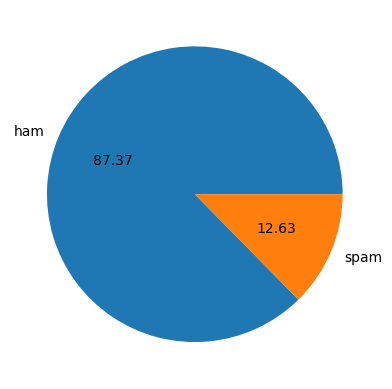

In [22]:
plt.pie(new_df['target'].value_counts() , labels=['ham','spam'],autopct = '%0.2f')
plt.show()

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
new_df['num_characters'] = new_df['text'].apply(len)

In [25]:
new_df.sample()

,target,text,num_characters
3653,0,Why i come in between you people,32


In [26]:
new_df['num_words'] = new_df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [27]:
new_df['num_sentences'] = new_df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

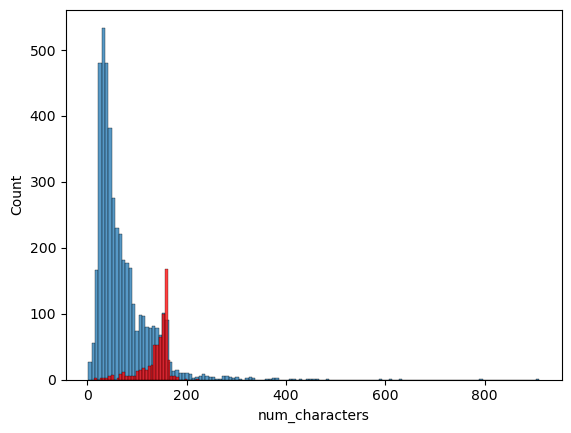

In [29]:
sns.histplot(new_df[new_df['target'] == 0]['num_characters'])
sns.histplot(new_df[new_df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

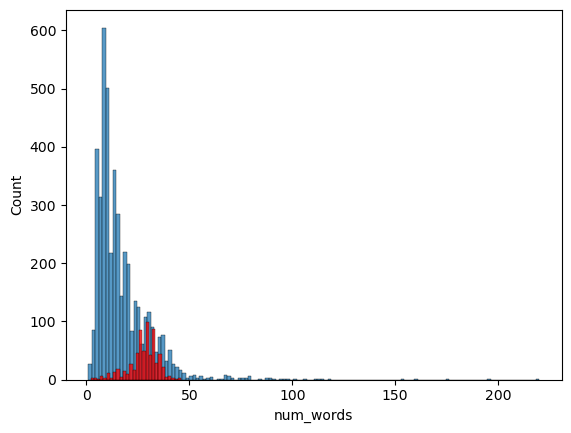

In [30]:
sns.histplot(new_df[new_df['target'] == 0]['num_words'])
sns.histplot(new_df[new_df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

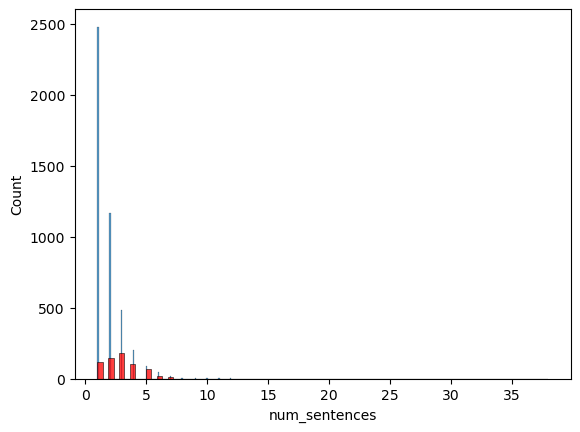

In [31]:
sns.histplot(new_df[new_df['target'] == 0]['num_sentences'])
sns.histplot(new_df[new_df['target'] == 1]['num_sentences'],color='red')

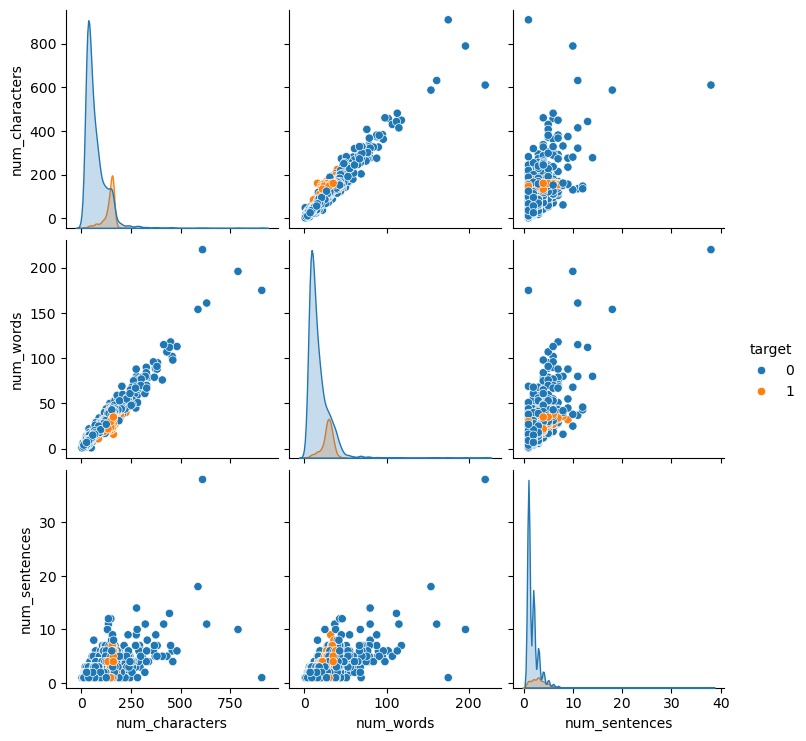

In [32]:
sns.pairplot(new_df,hue='target')

<Axes: >

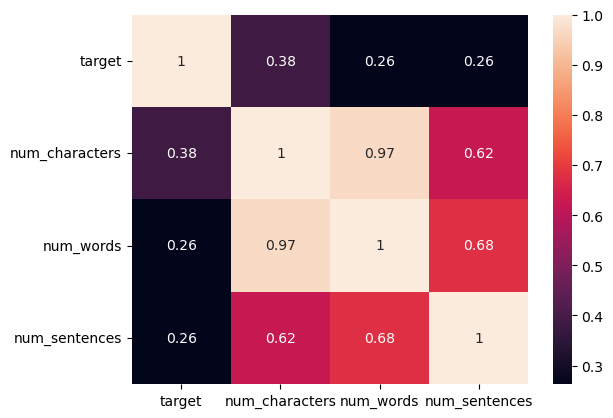

In [33]:
numeric_df = new_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)


In [34]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    text = l.copy()
    l.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(ps.stem(i))
    return " ".join(l)
            
    

In [36]:
transform_text('I loved the YT lectures on Machine Learning?')

'love yt lectur machin learn'

In [37]:
new_df['text'] = new_df['text'].apply(transform_text)

In [38]:
new_df['text'].sample(5)

417     free entri weekli competit text word win 80086...
4938    tomarrow want got court lt decim gt come bu st...
4548        haha friend tyler liter ask could get dubsack
4786                               ìï thk wat eat tonight
3427                     darlin youphon im athom youwanna
Name: text, dtype: object

In [39]:
new_df['text'][2745]

'r go 4 today meet'

In [40]:
!pip install wordcloud

In [41]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')

In [42]:
spam_wc = wc.generate(new_df[new_df['target'] == 1]['text'].str.cat(sep=' '))

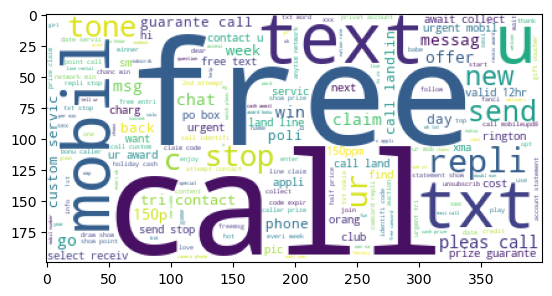

In [43]:
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(new_df[new_df['target'] == 0]['text'].str.cat(sep=' '))

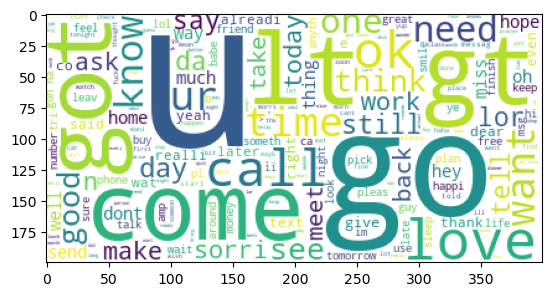

In [45]:
plt.imshow(ham_wc)

In [46]:
spam_corpas = []

for msg in new_df[new_df['target']==1]['text'].tolist():
    for word in msg.split():
        spam_corpas.append(word)

In [47]:
len(spam_corpas)

9939

In [48]:
from collections import Counter

In [49]:
pd.DataFrame(Counter(spam_corpas).most_common(10))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


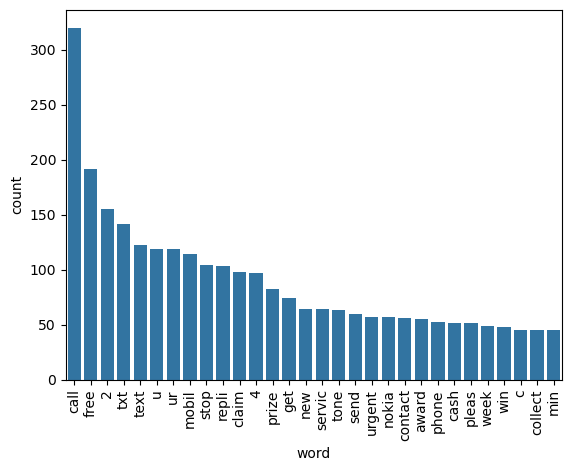

In [50]:
most_common_df = pd.DataFrame(Counter(spam_corpas).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

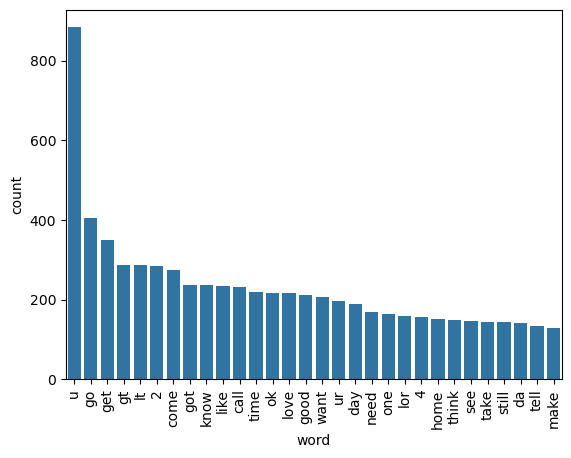

In [51]:
ham_corpas = []

for msg in new_df[new_df['target']==0]['text'].tolist():
    for word in msg.split():
        ham_corpas.append(word)

most_common_ham_word = pd.DataFrame(Counter(ham_corpas).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_ham_word)
plt.xticks(rotation='vertical')
plt.show()

<h1>Model building<h1>

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features=2500)
import numpy as np

In [53]:
X = tfv.fit_transform(new_df['text']).toarray()

In [54]:
# X = np.hstack((X,new_df['num_characters'].values.reshape(-1,1)))

In [55]:
X.shape 

(5169, 2500)

In [56]:
y = new_df['target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [60]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8539651837524178
[[762 127]
 [ 24 121]]
0.4879032258064516


In [63]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[888   1]
 [ 25 120]]
0.9917355371900827


In [64]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[884   5]
 [ 18 127]]
0.9621212121212122


In [65]:
import pickle

In [66]:
pickle.dump(mnb,open('model.pkl','wb'))